In [6]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

Download and Prepare the CIFAR10 Dataset

In [2]:
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()
#Normalize the Pixel values to be between 0 and 1
train_images, test_images = train_images/255.0, test_images/255.0

170500096/170498071 [==============================] - 3s 0us/step


DATA VERIFICATION

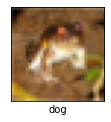

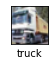

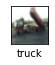

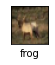

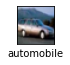

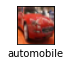

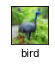

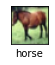

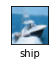

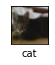

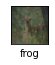

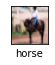

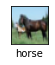

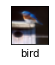

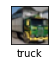

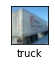

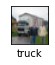

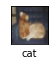

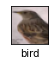

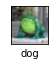

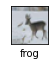

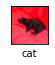

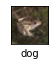

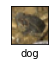

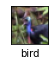

In [4]:
class_names=['airplane','automobile','bird','cat','frog','deer','dog','horse','ship','truck']
plt.figure(figsize=(10,10))
for i in range (25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  #The CIFAR labels happen to arrays,
  # Which is why you need the extra index
  plt.xlabel(class_names[train_labels [i][0]])
  plt.show()

CREATE CONVOLUTIONAL BASE

In [10]:
model= models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

Lets display the Architecture So far

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


ADD DENSE LAYERS ON TOP

In [12]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(10))


Here's the complete Architecture of the model

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

Compile and Train the Model

In [14]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history=model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.7284 - accuracy: 0.3604 - val_loss: 1.2213 - val_accuracy: 0.5610
Epoch 2/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.1750 - accuracy: 0.5846 - val_loss: 1.0566 - val_accuracy: 0.6315
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0030 - accuracy: 0.6473 - val_loss: 1.0518 - val_accuracy: 0.6296
Epoch 4/10
1563/1563 [==============================] - 66s 43ms/step - loss: 0.8994 - accuracy: 0.6858 - val_loss: 0.9400 - val_accuracy: 0.6726
Epoch 5/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8259 - accuracy: 0.7139 - val_loss: 0.8710 - val_accuracy: 0.7022
Epoch 6/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.7572 - accuracy: 0.7367 - val_loss: 0.8756 - val_accuracy: 0.6986
Epoch 7/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.7103 - accuracy: 0.7511 - val_loss: 0.8761 -

EVALUATE THE MODEL


In [15]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)

313/313 - 4s - loss: 0.8684 - accuracy: 0.7114


In [16]:
print(test_acc)

0.7113999724388123


Our simple CNN has achieved a test accuracy of over 70%